![front1](jupyter_img/front.png)

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorials

## Further Information

#### * Qiskit: https://qiskit.org

#### * Qiskit GitHub: https://github.com/Qiskit

# 1. Introduction

![pillars](jupyter_img/TheoreticalPillarsQC.png)

![hardware](jupyter_img/QuantumHardwareRoadmap.png)

![motivation](jupyter_img/motivation.png)

## What is Qiskit?

* Quantum Information Science Kit

* Open-source SDK for working with quantum computers at the level of pulses, circuits and algorithms

* Founded by IBM Research in 2017 to allow software development for their cloud quantum computing service known as IBM Q Experience.

* The primary version of Qiskit uses the Python programming language. It is used to create quantum programs based on the OpenQASM (Open Quantum Assembly Language) representation of quantum instructions.


## What can we do with Qiskit?

* Access to circuits
* Access to a library of quantum algorithms
* Access to quantum hardware
* Access to optimization against noise

## IBM Quantum Experience Backend

* 9 real quantum devices with number of qubits 1, 5, and 16.
* 32-qubit simulator

![qiskit_elem](jupyter_img/qiskit_elem.png)

## Main simulator backends

1. __QASM Simulator__: It emulates execution of a quantum circuits on a real device and returns __measurement counts__. It includes highly configurable noise models and can even be loaded with automatically generated approximate noise models based on the calibration parameters of actual hardware devices.

    * What is __QASM__? QASM = Quantum Assembly Language (see https://arxiv.org/abs/1707.03429 for more detail)
    

2. __Statevector Simulator__: It simulates the ideal execution of a quantum circuit and returns __the final quantum state vector__ of the device at the end of simulation.

3. __Unitary Simulator__: It allows simulation of the final unitary matrix implemented by an ideal quantum circuit. This only works if all the elements in the circuit are unitary operations.

![workflow](jupyter_img/workflow.png)

## How to start

1. Start Online: https://quantum-computing.ibm.com

## How to start

2. Start Locally 

<br>

* Qiskit is tested and supported on the following 64-bit systems:


    * Ubuntu 16.04 or later
    * macOS 10.12.6 or later
    * Windows 7 or later
    

* To install Qiskit locally, you will need Python 3.5+.

* IBM recommends using a virtual environment with Anaconda, a cross-platform Python distribution for scientific computing: https://www.anaconda.com/products/individual

## Let's start on Mac

![inst_mac](jupyter_img/inst_mac.png)

## Let's start on Windows

![inst_w1](jupyter_img/inst_w1.png)

## Let's start on Windows

![inst_w2](jupyter_img/inst_w2.png)

## Let's start on Windows

![inst_w3](jupyter_img/inst_w3.png)

# 2. Quantum Circuit Basics

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [2]:
# Create a quantum register with 2 qubits
q = QuantumRegister(2,'q')
# Form a quantum circuit
# Note that the circuit name is optional
qc = QuantumCircuit(q,name="first_qc")
# Display the quantum circuit
qc.draw()

## Qiskit quantum operations summary: 
### <a href="https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html" target="_blank"> https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html</a>

In [3]:
# Add a Hadamard gate on qubit 0, putting this in superposition.
qc.h(0)
# Add a CX (CNOT) gate on control qubit 0 
# and target qubit 1 to create an entangled state.
qc.cx(0, 1)
qc.draw()

In [4]:
# Create a classical register with 2 bits
c = ClassicalRegister(2,'c')

meas = QuantumCircuit(q,c,name="first_m")
meas.barrier(q)
meas.measure(q, c)

meas.draw()

In [5]:
# Quantum circuits can be added with + operations
# Add two pre-defined circuits
qc_all=qc+meas
qc_all.draw()

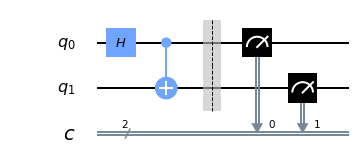

In [6]:
# Draw the quantum circuit in a different (slightly better) format
qc_all.draw(output='mpl')

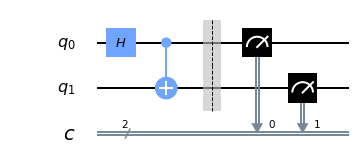

In [84]:
# Create the quantum circuit with the measurement in one go.
qc_all = QuantumCircuit(q,c,name="2q_all")
qc_all.h(0)
qc_all.cx(0,1)
qc_all.barrier()
qc_all.measure(0,0)
qc_all.measure(1,1)
qc_all.draw(output='mpl')

In [7]:
# Use Aer's qasm_simulator
backend_q = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
job_sim1 = execute(qc_all, backend_q, shots=4096)

In [8]:
job_sim1.status()

<JobStatus.DONE: 'job has successfully run'>

In [9]:
# Grab the results from the job.
result_sim1 = job_sim1.result()
result_sim1

namespace(backend_name='qasm_simulator',
          backend_version='0.3.2',
          qobj_id='944ac6fa-832c-4ecd-a579-f14eb1b1be04',
          job_id='7d81d747-8230-4474-b9d5-f73191109997',
          success=True,
          results=[namespace(shots=4096,
                             success=True,
                             data=namespace(counts=namespace(0x0=1995,
                                                             0x3=2101)),
                             meas_level=2,
                             header=namespace(memory_slots=2,
                                              clbit_labels=[['c', 0],
                                                            ['c', 1]],
                                              name='circuit2',
                                              qubit_labels=[['q', 0],
                                                            ['q', 1]],
                                              n_qubits=2,
                                              qre

In [10]:
result_sim1.get_counts(qc_all)

{'00': 1995, '11': 2101}

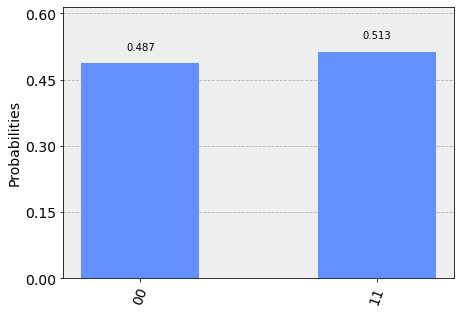

In [11]:
plot_histogram(result_sim1.get_counts(qc_all))

In [12]:
# Use Aer's statevector_simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute the circuit on the statevector simulator.
# It is important to note that the measurement has been excluded
job_sim2 = execute(qc, backend_sv)

In [14]:
# Grab the results from the job.
result_sim2 = job_sim2.result()
# Output the entire result
result_sim2

namespace(backend_name='statevector_simulator',
          backend_version='0.3.2',
          qobj_id='1861012f-18e1-4186-80eb-848ae00b8cad',
          job_id='2e6f72fa-2de1-4166-8414-d03ce5c6ec02',
          success=True,
          results=[namespace(shots=1,
                             success=True,
                             data=namespace(statevector=[(0.7071067811865476+0j),
                                                         0j,
                                                         0j,
                                                         (0.7071067811865475+0j)]),
                             meas_level=2,
                             header=namespace(memory_slots=0,
                                              clbit_labels=[],
                                              name='first_qc',
                                              qubit_labels=[['q', 0],
                                                            ['q', 1]],
                                     

[0.70711+0.j 0.     +0.j 0.     +0.j 0.70711+0.j]


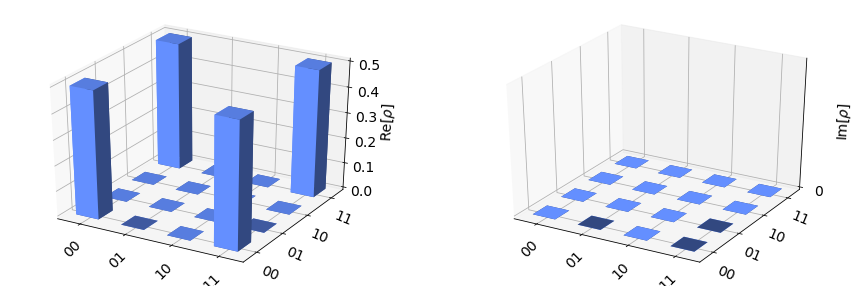

In [15]:
# See output state as a vector
outputstate = result_sim2.get_statevector(qc, decimals=5)
print(outputstate)

# Visualize density matrix
plot_state_city(outputstate)

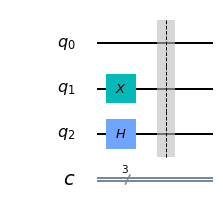

In [16]:
# Create the quantum circuit with the measurement in one go.
qc_3 = QuantumCircuit(3,3,name="qc_bloch")
qc_3.x(1)
qc_3.h(2)
qc_3.barrier()
qc_3.draw(output='mpl')

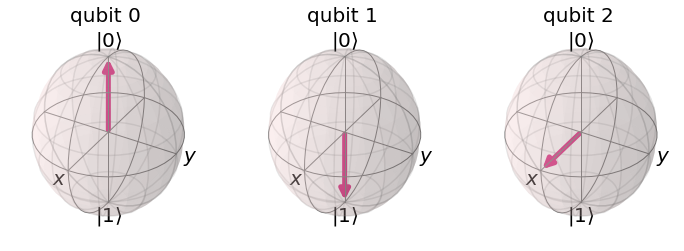

In [17]:
# Execute the circuit on the statevector simulator.
# It is important to note that the measurement has been excluded
job_sim_bloch = execute(qc_3, backend_sv)

# Grab the results from the job.
result_sim_bloch = job_sim_bloch.result()

# See output state as a vector
output_bloch = result_sim_bloch.get_statevector(qc_3, decimals=5)

# Draw on the Bloch sphere
plot_bloch_multivector(output_bloch)

In [52]:
# Use Aer's unitary_simulator
backend_u = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator.
job_usim = execute(qc, backend_u)

# Grab the results from the job.
result_usim = job_usim.result()
result_usim

namespace(backend_name='unitary_simulator',
          backend_version='0.3.2',
          qobj_id='5518d9ba-fed3-4b4c-a9aa-a92c72010b39',
          job_id='e3d1367f-6943-4fa0-a8ef-25156827f137',
          success=True,
          results=[namespace(shots=1,
                             success=True,
                             data=namespace(unitary=[[(0.7071067811865476+0j),
                                                      (0.7071067811865475+0j),
                                                      0j,
                                                      0j],
                                                     [0j,
                                                      0j,
                                                      (0.7071067811865475+0j),
                                                      (-0.7071067811865476+0j)],
                                                     [0j,
                                                      0j,
                                  

In [53]:
# Output the unitary matrix
unitary = result_usim.get_unitary(qc)
print('%s\n' % unitary)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]



## Exercise 1:  
## Design a quantum circuit to create the following 2-qubit entangled state: $\frac{|01\rangle+|10\rangle}{\sqrt{2}}$. 
## Check the answer with the QASM simulation and by plotting the histogram of the measurement statistics.

In [21]:
# Create the quantum circuit with the measurement in one go.
qc_ex1 = QuantumCircuit(q,c,name="ex1")

In [22]:
# Put the first qubit in equal superposition
qc_ex1.h(0)

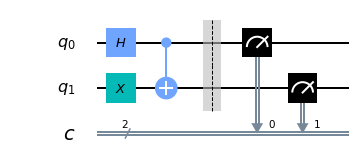

In [23]:
# Rest of the circuit
qc_ex1.x(1)
qc_ex1.cx(0,1)
qc_ex1.barrier()
qc_ex1.measure(0,0)
qc_ex1.measure(1,1)
qc_ex1.draw(output='mpl')

In [24]:
# Execute the circuit on the qasm simulator.
job_ex1 = execute(qc_ex1, backend_q, shots=4096)

In [25]:
job_ex1.status()

<JobStatus.DONE: 'job has successfully run'>

In [197]:
# Grab the results from the job.
result_ex1 = job_ex1.result()
result_ex1.get_counts(qc_ex1)

{'10': 2117, '01': 1979}

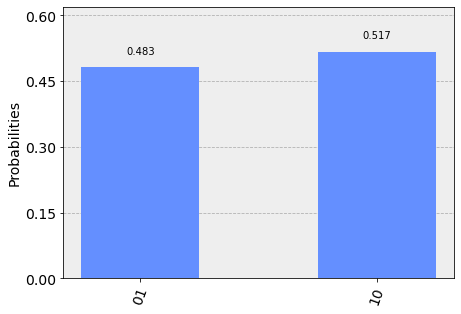

In [198]:
plot_histogram(result_ex1.get_counts(qc_ex1))

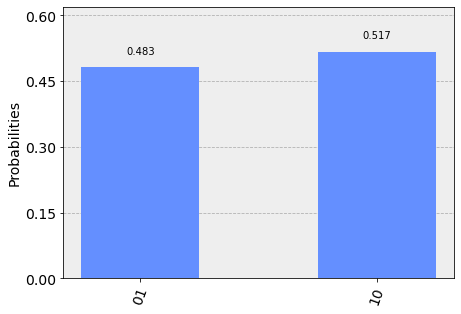

In [199]:
# Or get the histogram in one go
plot_histogram(job_ex1.result().get_counts(qc_ex1))

## Exercise 2:  
## Design a quantum circuit that creates a 3-qubit entangled state: $\alpha|000\rangle+\beta|111\rangle$,
## such that $|\alpha|^2 = 0.25$, and $|\beta|^2 = 0.75$. 
## Check the answer with the QASM simulation and by plotting the histogram of the measurement statistics.

### Hint:
$R_y(\theta) = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2)\\ \sin(\theta/2) & \cos(\theta/2)\end{bmatrix}$ can be implemented by the qiskit code: `qc.ry(theta,q)`

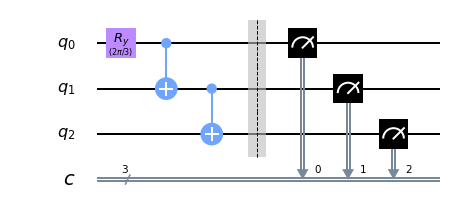

In [200]:
# Create a quantum register with 3 qubits
q3 = QuantumRegister(3,'q')
# Create a classical register with 3 qubits
c3 = ClassicalRegister(3,'c')

# Create the quantum circuit with the measurement in one go.
qc_ex2 = QuantumCircuit(q3,c3,name="ex1")

qc_ex2.ry(2*np.pi/3,0)
qc_ex2.cx(0,1)
qc_ex2.cx(1,2)
qc_ex2.barrier()
qc_ex2.measure(q3,c3)
qc_ex2.draw(output='mpl')

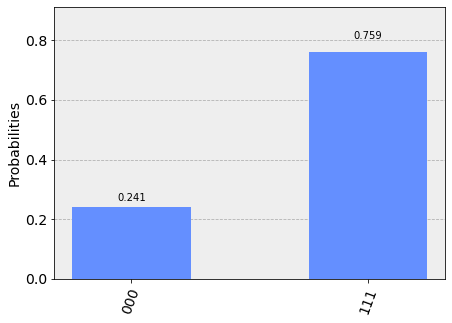

In [201]:
# Execute the circuit on the qasm simulator.
job_ex2 = execute(qc_ex2, backend_q, shots=4096)

# Grab the results from the job.
result_ex2 = job_ex2.result()
plot_histogram(result_ex2.get_counts(qc_ex2))

## 3-qubit gate example: Toffoli gate

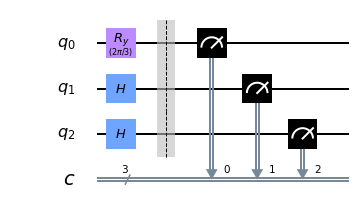

In [202]:
# Create a quantum register with 3 qubits
q3 = QuantumRegister(3,'q')
# Create a classical register with 3 qubits
c3 = ClassicalRegister(3,'c')

# Create the quantum circuit without a Toffoli gate
qc_toff = QuantumCircuit(q3,c3,name="ex1")

qc_toff.ry(2*np.pi/3,0)
qc_toff.h(1)
qc_toff.h(2)
qc_toff.barrier()
qc_toff.measure(q3,c3)
qc_toff.draw(output='mpl')

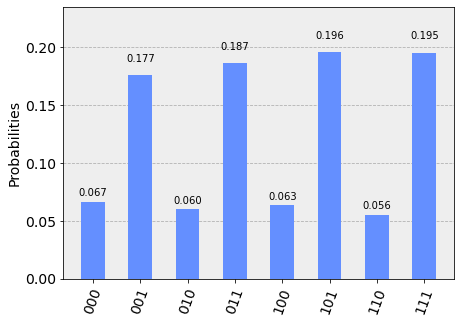

In [203]:
# Execute the circuit on the qasm simulator.
job_toff = execute(qc_toff, backend_q, shots=4096)

# Grab the results from the job.
result_toff = job_toff.result()
plot_histogram(result_toff.get_counts(qc_toff))

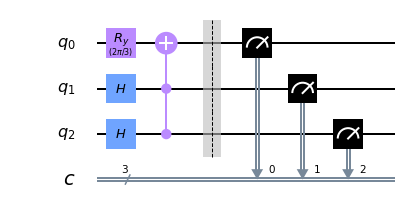

In [204]:
# Now, add a Toffoli gate
qc_toff = QuantumCircuit(q3,c3,name="ex1")

qc_toff.ry(2*np.pi/3,0)
qc_toff.h(1)
qc_toff.h(2)
qc_toff.ccx(1,2,0)
qc_toff.barrier()
qc_toff.measure(q3,c3)
qc_toff.draw(output='mpl')

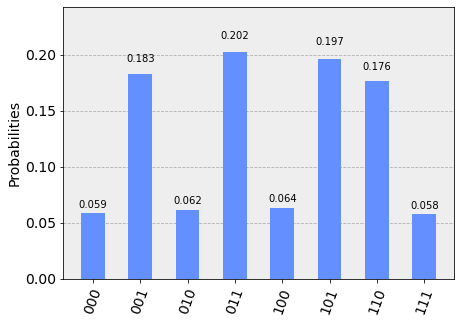

In [205]:
# Execute the circuit on the qasm simulator.
job_toff = execute(qc_toff, backend_q, shots=4096)

# Grab the results from the job.
result_toff = job_toff.result()
plot_histogram(result_toff.get_counts(qc_toff))

## Native single-qubit gates of IBM Q devices

One way to write a general form of a single qubit unitary:
<br>
<br>
$$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$
***
Native single qubit gates:
* `u3`=$U(\theta,\phi,\lambda)$
* `u2`=$U(\pi/2,\phi,\lambda)$
* `u1`=$U(0,0,\lambda)$

Native two qubit gate:
* controlled-NOT

### But why such form? $\rightarrow$ This is related to gate implementations on real devices

### Note that $$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$ 
### can be written as:
### \begin{align}
U(\theta,\phi,\lambda)&=R_z(\phi)R_y(\theta)R_z(\lambda)\\
&=R_z(\phi)R_x(-\pi/2)R_z(\theta)R_x(\pi/2)R_z(\lambda)
\end{align}

### In RF/MW based quantum control, $R_z$ is given for free, and $R_x(\pm\pi/2)$ can be calibrated with high precision.

## Running Quantum Circuits on IBM Q
![ibmq](jupyter_img/ibmq.jpeg)

### Need IBM Token for running an experiment on a IBM cloud quantum computer:  https://quantum-computing.ibm.com

In [233]:
IBMQ.disable_account()
provider = IBMQ.enable_account('IBM_TOKEN')

In [235]:
# provider = IBMQ.get_provider(hub='ibm-q-research')

In [236]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-research', group='Daniel-Park', pro

In [212]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [213]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_rome                    ibmq_armonk                  ibmq_essex
---------                    -----------                  ----------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 6              Pending Jobs: 2              Pending Jobs: 70
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      77.2           Avg. T1:      149.4          Avg. T1:      104.2
Avg. T2:      109.1          Avg. T2:      225.6          Avg. T2:      143.5



ibmq_burlington              ibmq_london                  ibmq_valencia
---------------              -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 7              Pending Jobs: 7              Pending Jobs: 6
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

In [214]:
# Let's get two quantum devices as an example
backend_qx2 = provider.get_backend('ibmqx2')
backend_vigo = provider.get_backend('ibmq_vigo')

In [215]:
backend_monitor(backend_qx2)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 13
    backend_version: 2.1.0
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    sample_name: sparrow
    memory: True
    credits_required: True
    meas_map: [[0, 1, 2, 3, 4]]
    max_shots: 8192
    n_registers: 1
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]
    description: 5 qubit device
    backend_name: ibmqx2
    quantum_volume: 8
    conditional: False
    open_pulse: False
    allow_q_object: True
    url: None
    max_experiments: 75
    allow_object_storage: True
    online_date: 2017-01-24T05:00:00+00:00

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.2829 GHz / 73.79798 µs / 27.86901 µs / 0.0 / 0.00133 / 0.00266 / 0.0495
    Q1 / 5.24766 GHz / 61.

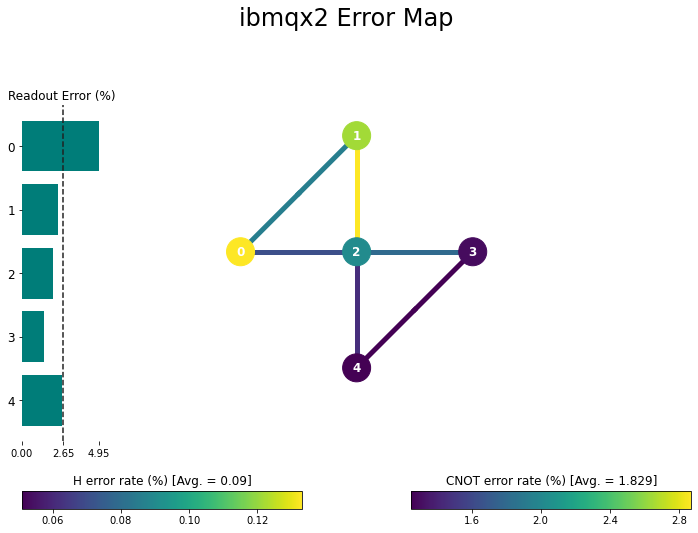

In [216]:
plot_error_map(backend_qx2)

In [217]:
backend_monitor(backend_vigo)

ibmq_vigo
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 7
    backend_version: 1.0.3
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    sample_name: Giraffe
    memory: True
    credits_required: True
    meas_map: [[0, 1, 2, 3, 4]]
    max_shots: 8192
    n_registers: 1
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    description: 5 qubit device Vigo
    backend_name: ibmq_vigo
    quantum_volume: 16
    conditional: False
    open_pulse: False
    allow_q_object: True
    url: None
    max_experiments: 75
    allow_object_storage: True
    online_date: 2019-07-03T04:00:00+00:00

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 4.79649 GHz / 122.04295 µs / 13.28137 µs / 0.0 / 0.00035 / 0.0007 / 0.008
    Q1 / 4.94014 GHz / 64.04633 µs / 78.91768 µ

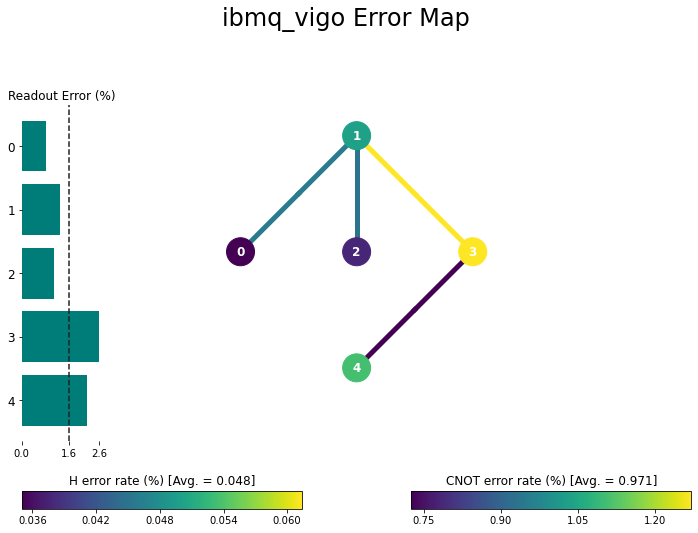

In [218]:
plot_error_map(backend_vigo)

## Let's create a 5-qubit GHZ state, i.e. $ \frac{|00000\rangle + |11111\rangle}{\sqrt{2}}$.

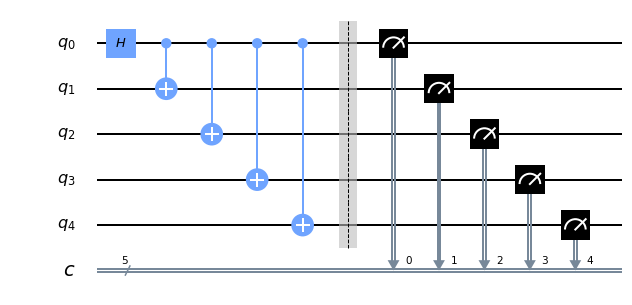

In [219]:
#![sdc2](jupyter_img/superdensecoding2.png)
# Create a 5-qubit GHZ state (i.e. (|00000> + |11111>)/sqrt(2))
q5 = QuantumRegister(5,'q')
c5 = ClassicalRegister(5,'c')
ghz5= QuantumCircuit(q5,c5)

ghz5.h(0)
for i in range(1,5):
    ghz5.cx(0,i)

ghz5.barrier()
ghz5.measure(q5,c5)
ghz5.draw(output='mpl')

## Now, let's run it on a real IBMQ device.

In [221]:
# Run the 5-qubit GHZ experiment on a 5-qubit device (try vigo)
job_exp1 = execute(ghz5, backend=backend_vigo, shots=4096)
job_monitor(job_exp1)

Job Status: job has successfully run


In [223]:
# Grab experimental results
result_vigo = job_exp1.result()
counts_vigo = result_vigo.get_counts(ghz5)

In [222]:
# Let's also try the same experiment on the 14-qubit device.
job_exp2 = execute(ghz5, backend=provider.get_backend('ibmq_16_melbourne'), shots=4096)
job_monitor(job_exp2)

Job Status: job has successfully run


In [224]:
# Grab experimental results
result_mel = job_exp2.result()
counts_mel = result_mel.get_counts(ghz5)

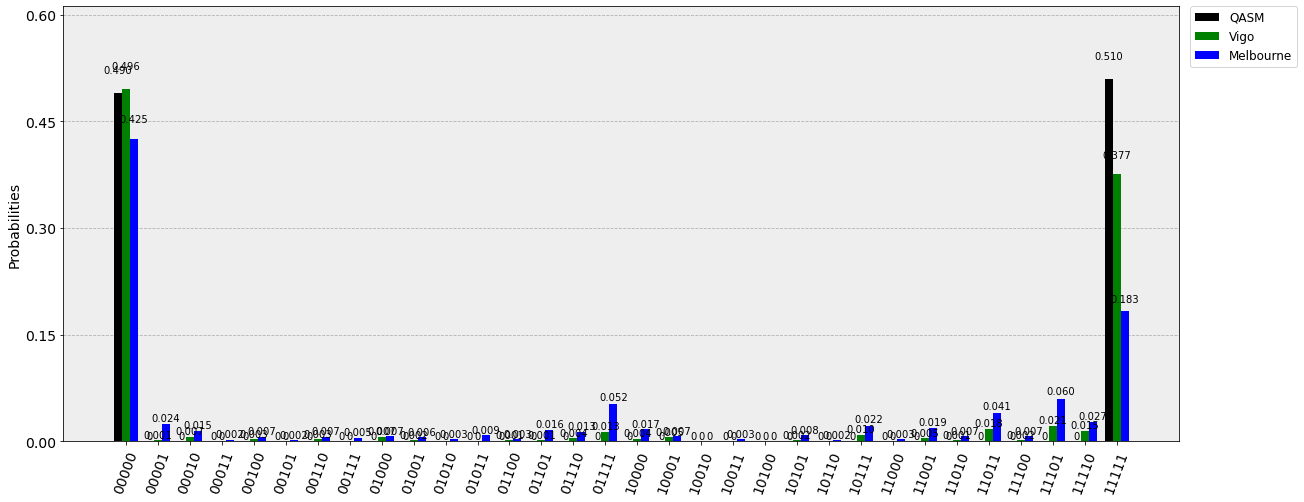

In [225]:
# Now, compare to theory by running it on qasm_simulator
job_qasm = execute(ghz5,backend=backend_q)
result_qasm = job_qasm.result()
counts_qasm = result_qasm.get_counts(ghz5)

# Plot both experimental and ideal results
plot_histogram([counts_qasm,counts_vigo,counts_mel],
               color=['black','green','blue'],
               legend=['QASM','Vigo','Melbourne'],figsize = [20,8])

# 3. Parametrized Quantum Circuits

## Parameterized Circuits

* Can be very useful for various simulations and experiments

### Binding parameters to values

* All circuit parameters must be bound before sending the circuit to a backend.
* The `bind_parameters` method accepts a dictionary mapping Parameters to values, and returns a new circuit with each parameter replaced by its corresponding value.
* `qiskit.execute` now accepts a `parameter_binds` keyword argument which, when specified as a list of dictionaries mapping Parameters to values, will bind and execute a circuit on the backend for every mapping dictionary in the list.

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit import Parameter

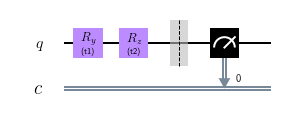

In [112]:
# Simple example

# Define two parameters, t1 and t2
theta1 = Parameter('t1')
theta2 = Parameter('t2')

# Build a 1-qubit circuit
qc = QuantumCircuit(1, 1)

# First parameter, t1, is used for a single qubit rotation of a controlled qubit
qc.ry(theta1,0)
qc.rz(theta2,0)

qc.barrier()

qc.measure(0, 0)

qc.draw(output='mpl')

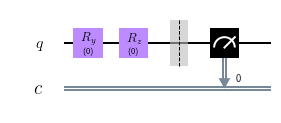

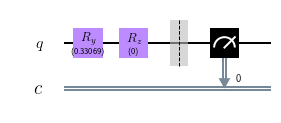

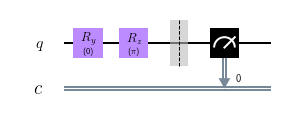

In [113]:
theta1_range = np.linspace(0, 2 * np.pi, 20)
theta2_range = np.linspace(0, np.pi, 2)

circuits = [qc.bind_parameters({theta1: theta_val1, theta2: theta_val2})
            for theta_val2 in theta2_range for theta_val1 in theta1_range ]

# Visualize several circuits to check that correct circuits are generated correctly.
display(circuits[0].draw(output='mpl'))
display(circuits[1].draw(output='mpl'))
display(circuits[20].draw(output='mpl'))

In [114]:
# Execute multiple circuits
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 8192,
              parameter_binds=[{theta1: theta_val1, theta2: theta_val2} 
                               for theta_val2 in theta2_range for theta_val1 in theta1_range])

# Store all counts
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]

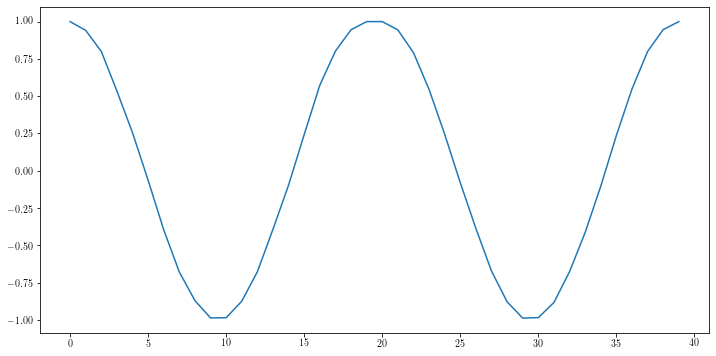

In [117]:
# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts: (counts.get('0',0)-counts.get('1',1))/8192,counts)))
plt.show()

## Let's try it on a real quantum device

In [74]:
# IBMQ.disable_account()
provider = IBMQ.enable_account('TOKEN')

In [75]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [106]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_rome                    ibmq_santiago                ibmq_armonk
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 5              Pending Jobs: 5              Pending Jobs: 19
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      65.7           Avg. T1:      130.6          Avg. T1:      183.4
Avg. T2:      77.5           Avg. T2:      128.1          Avg. T2:      218.9



ibmq_essex                   ibmq_burlington              ibmq_london
----------                   ---------------              -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 3              Pending Jobs: 0
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Op

In [86]:
# Execute multiple circuits
job_exp = execute(qc, backend=provider.get_backend('ibmq_essex'), shots = 8192,
              parameter_binds=[{theta1: theta_val1, theta2: theta_val2} 
                               for theta_val2 in theta2_range for theta_val1 in theta1_range])

# Monitor job status
job_monitor(job_exp)

# Store all counts
counts_exp = [job_exp.result().get_counts(i) for i in range(len(job_exp.result().results))]

Job Status: job has successfully run


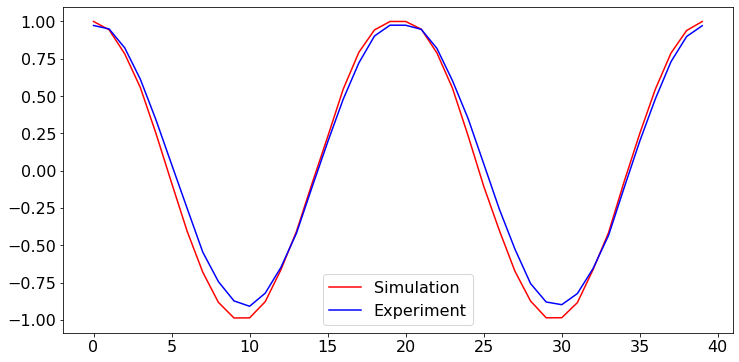

In [92]:
# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts: (counts.get('0',0)-counts.get('1',1))/8192,counts)),'r',label='Simulation')
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts_exp: (counts_exp.get('0',0)-counts_exp.get('1',1))/8192,counts_exp)),
         'b',label='Experiment')
plt.legend(loc='best')
plt.show()

# 3. Transpilation

## Limitations of Current Quantum Devices

- Noisy qubits: Total runtime must be much less than T1 and T2 (in the orde of 10-100 $\mu$s)
- Noisy gates

__$\rightarrow$ Circuit depth must be as shallow as possible__

__Let's look at the 15 qubit IBM quantum device:__
<div>
<img src="jupyter_img/ibmq_mel.png" width="600"/>
</div>

- Arbitrary gates must be decomposed into the native (basis) gate set

- Limited qubit connectivity for entangling gates.
    - In general, `swap` gates (~ 3 `cnot`) are used to complete the connectivity
<div>
<img src="jupyter_img/swap_to_cnot.png" width="400"/>
</div>

__$\rightarrow$ Increases the circuit depth__

### Must rewrite circuits (transpile) for device topology, and to minimize depth 

### Transpiler is qiskit's circuit-rewriting framework

### Note: compiler would correspond to a larger translation from circuits to the level of machine pulses.

In [3]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager, Layout

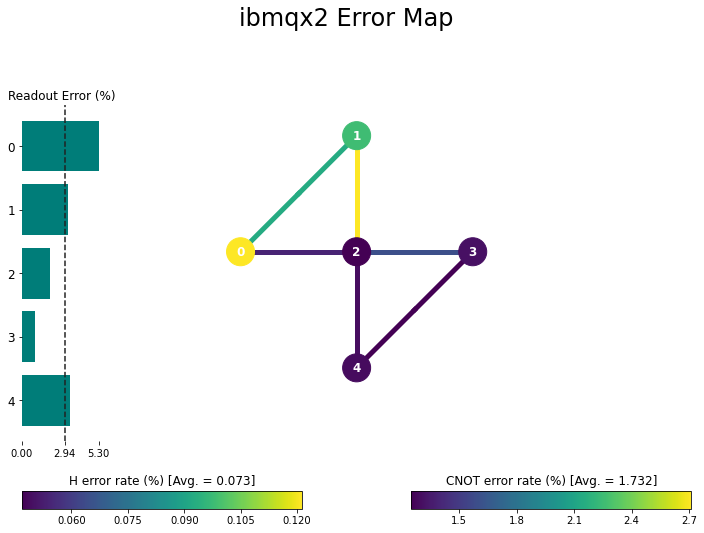

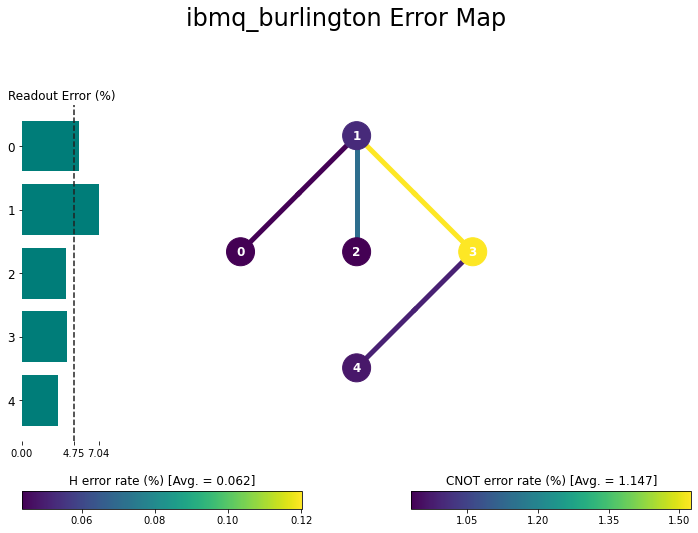

In [27]:
display(plot_error_map(provider.get_backend('ibmqx2')))
display(plot_error_map(provider.get_backend('ibmq_burlington')))

Original circuit


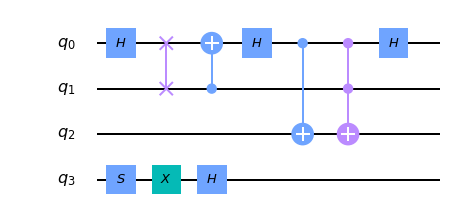

Transpiled circuit for ibmqx2


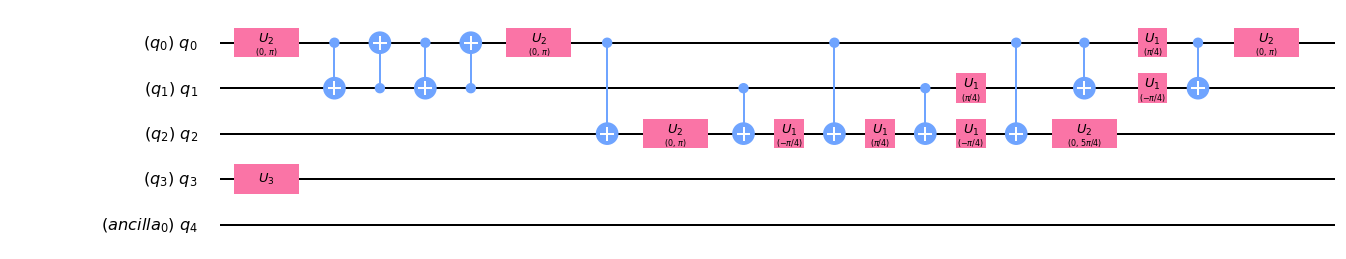

Transpiled circuit for ibmqx_Burlington


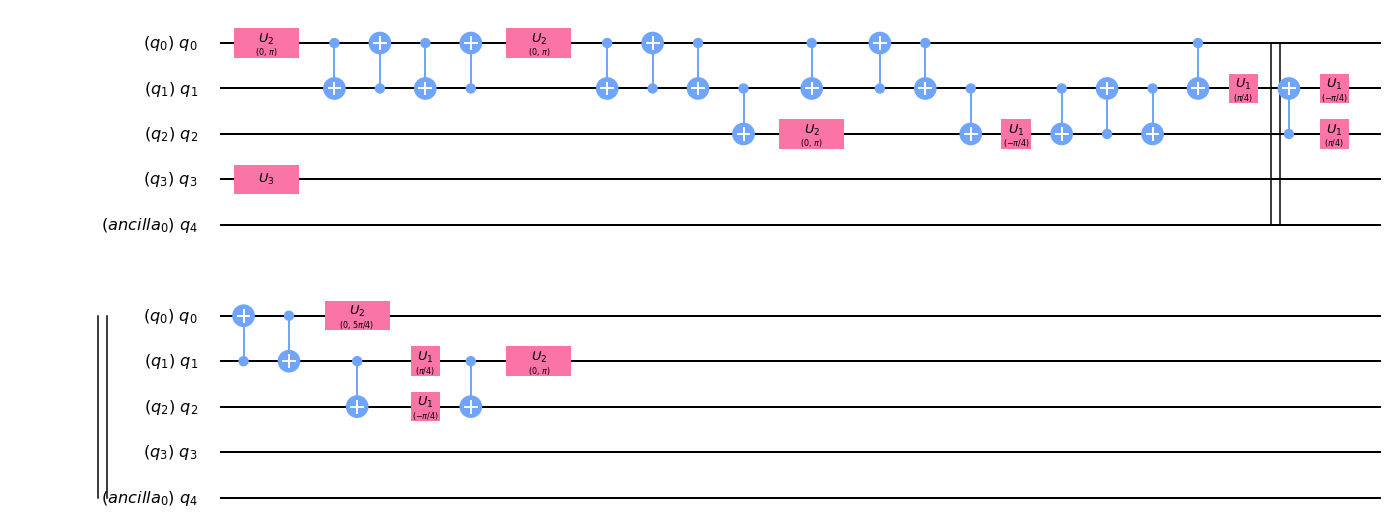

In [7]:
# Create a dummy circuit for default transpiler demonstration
qc = QuantumCircuit(4)
qc.h(0)
qc.swap(0,1)
qc.cx(1,0)
qc.s(3)
qc.x(3)
qc.h(3)
qc.h(0)
qc.cx(0,2)
qc.ccx(0,1,2)
qc.h(0)
print('Original circuit')
display(qc.draw(output='mpl'))

# Transpile the circuit to run on ibmqx2
qt_qx2 = transpile(qc,provider.get_backend('ibmqx2'))
print('Transpiled circuit for ibmqx2')
display(qt_qx2.draw(output='mpl'))

# Transpile the circuit to run on ibmq_burlington
qt_bu = transpile(qc,provider.get_backend('ibmq_burlington'))
print('Transpiled circuit for ibmqx_Burlington')
display(qt_bu.draw(output='mpl'))

In [29]:
# Print out some circuit properties
# Total nunmber of operations
print("Number of operations for ibmqx2 = %s" % qt_qx2.size())
print("Number of operations for ibmq_burlington = %s \n" % qt_bu.size())

# Circuit depth
print("Circuit depth for ibmqx2 = %s" % qt_qx2.depth())
print("Circuit depth for ibmq_burlington = %s \n" % qt_bu.depth())

# Number of qubits
print("Number of qubits for ibmqx2 = %s" % qt_qx2.width())
print("Number of qubits for ibmq_burlington = %s \n" % qt_bu.width())

# Breakdown of operations by type
print("Operations for ibmqx2: %s" % qt_qx2.count_ops())
print("Operations for ibmq_burlington: %s \n" % qt_bu.count_ops())


# Number of unentangled subcircuits in this circuit.
# In principle, each subcircuit can be executed on a different quantum device.
print("Number of unentangled subcircuits for ibmqx2 = %s" % qt_qx2.num_tensor_factors())
print("Number of unentangled subcircuits for ibmq_burlington = %s" % qt_bu.num_tensor_factors())

Number of operations for ibmqx2 = 23
Number of operations for ibmq_burlington = 32 

Circuit depth for ibmqx2 = 19
Circuit depth for ibmq_burlington = 28 

Number of qubits for ibmqx2 = 5
Number of qubits for ibmq_burlington = 5 

Operations for ibmqx2: OrderedDict([('cx', 11), ('u1', 6), ('u2', 5), ('u3', 1)])
Operations for ibmq_burlington: OrderedDict([('cx', 20), ('u1', 6), ('u2', 5), ('u3', 1)]) 

Number of unentangled subcircuits for ibmqx2 = 3
Number of unentangled subcircuits for ibmq_burlington = 3


## Pick physical qubits

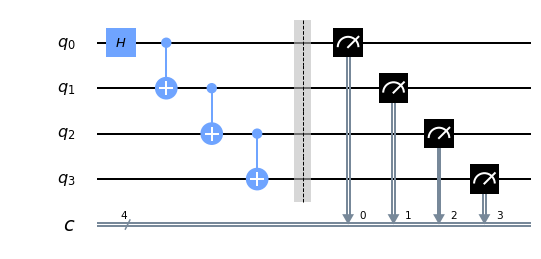

In [30]:
qr = QuantumRegister(4,'q')
cr = ClassicalRegister(4,'c')
qc_test = QuantumCircuit(qr,cr)

qc_test.h(0)
for i in range(3):
    qc_test.cx(i,i+1)

qc_test.barrier()
qc_test.measure(qr,cr)

qc_test.draw(output='mpl')

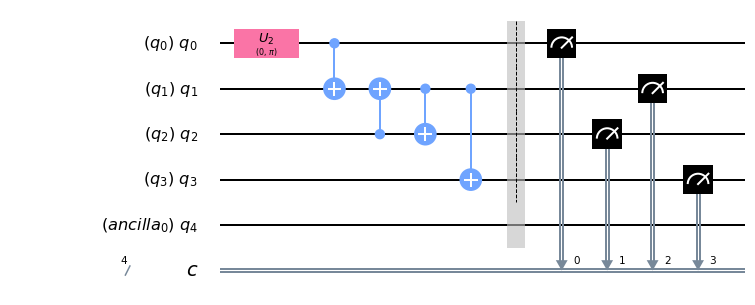

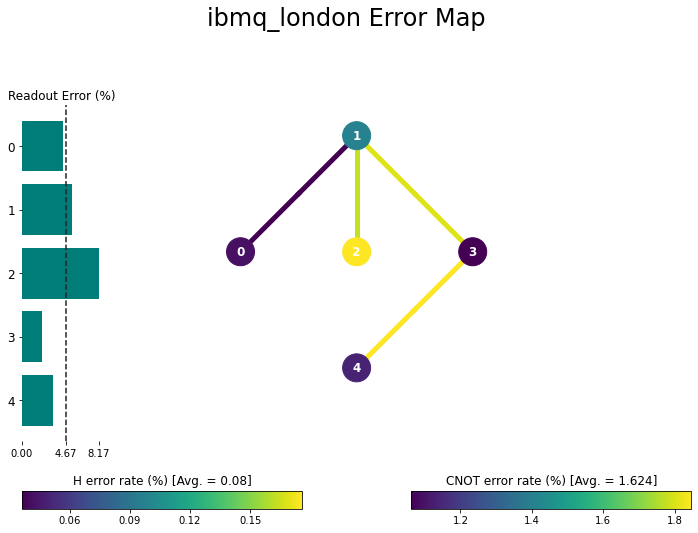

Number of operations = 9
Circuit depth = 6


In [31]:
qc_t = transpile(qc_test, backend = provider.get_backend('ibmq_london'))
# Display transpiled circuit
display(qc_t.draw(output='mpl'))
# Display the qubit layout
display(plot_error_map(provider.get_backend('ibmq_london')))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_t.size())
# Circuit depth
print("Circuit depth = %s" % qc_t.depth())

In [33]:
# Execute the circuit on the qasm simulator.
job_test = execute(qc_test, provider.get_backend('ibmq_london'), shots=8192)
job_monitor(job_test)

Job Status: job has successfully run


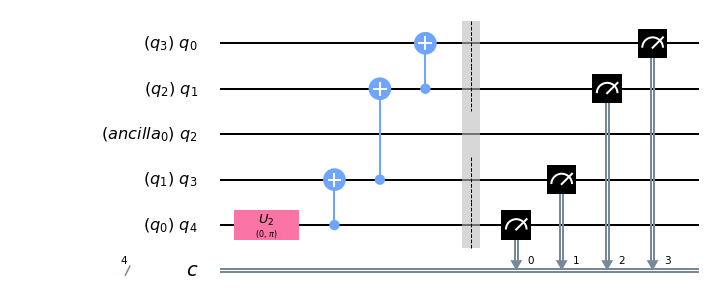

Number of operations = 8
Circuit depth = 5


In [34]:
# Customize the layout
layout = Layout({qr[0]: 4, qr[1]: 3, qr[2]: 1, qr[3]:0})
# Map it onto 5 qubit backend ibmqx2
qc_test_new = transpile(qc_test, backend = provider.get_backend('ibmq_london'), initial_layout=layout, basis_gates=['u1','u2','u3','cx'])
display(qc_test_new.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_test_new.size())
# Circuit depth
print("Circuit depth = %s" % qc_test_new.depth())

In [35]:
# Execute the circuit on the qasm simulator.
job_test_new = execute(qc_test_new, provider.get_backend('ibmq_london'), shots=8192)
job_monitor(job_test_new)

Job Status: job has successfully run


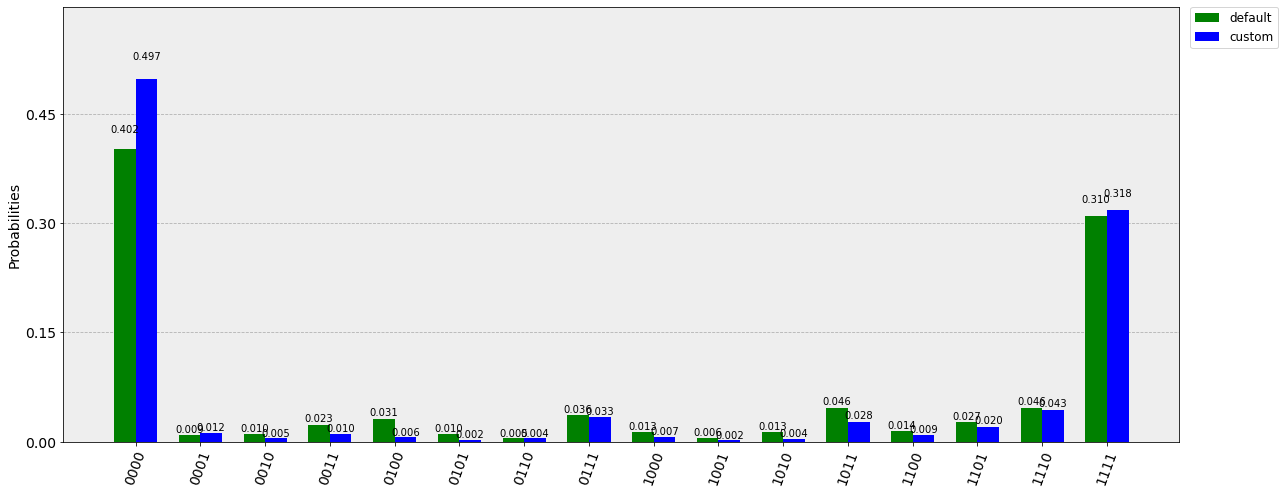

In [36]:
# Now, compare the two
result_test = job_test.result()
result_test_new = job_test_new.result()

# Plot both experimental and ideal results
plot_histogram([result_test.get_counts(qc_test),result_test_new.get_counts(qc_test_new)],
               color=['green','blue'],legend=['default','custom'],figsize = [20,8])

## Minimize `Swap`

### Strategy: Find the best circuit stochastically

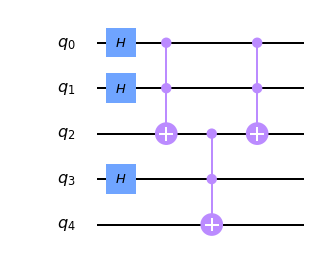

Number of operations = 6 

Operation counts = OrderedDict([('h', 3), ('ccx', 3)]) 

Circuit depth = 4


In [37]:
# Apply 4-qubit controlled x gate
qr = QuantumRegister(5,'q')
qc = QuantumCircuit(qr)

qc.h(0)
qc.h(1)
qc.h(3)

qc.ccx(0,1,2)
qc.ccx(2,3,4)
qc.ccx(0,1,2)
    
display(qc.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s \n" % qc.size())
# Count different types of operations
print("Operation counts = %s \n" % qc.count_ops())
# Circuit depth
print("Circuit depth = %s" % qc.depth())

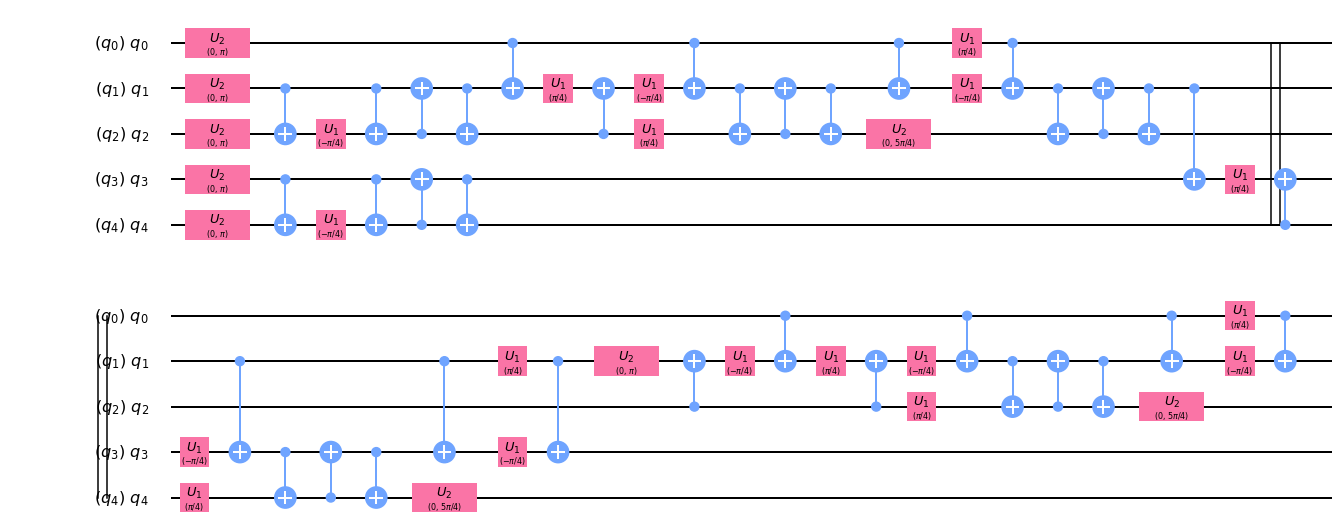

Number of operations = 63
Circuit depth = 45


In [38]:
qc_t = transpile(qc, provider.get_backend('ibmq_valencia'))
display(qc_t.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_t.size())
# Circuit depth
print("Circuit depth = %s" % qc_t.depth())

In [40]:
# Transpile many times (20 times in this example) and pick the best one
trial = 20
# Use ibmq_valencia for example
backend_exp = provider.get_backend('ibmq_valencia')

tcircs0 = transpile([qc]*trial, backend_exp, optimization_level=0)
tcircs1 = transpile([qc]*trial, backend_exp, optimization_level=1)
tcircs2 = transpile([qc]*trial, backend_exp, optimization_level=2)
tcircs3 = transpile([qc]*trial, backend_exp, optimization_level=3)

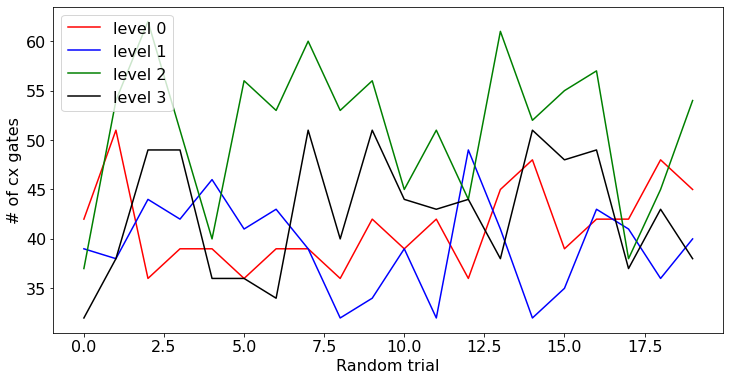

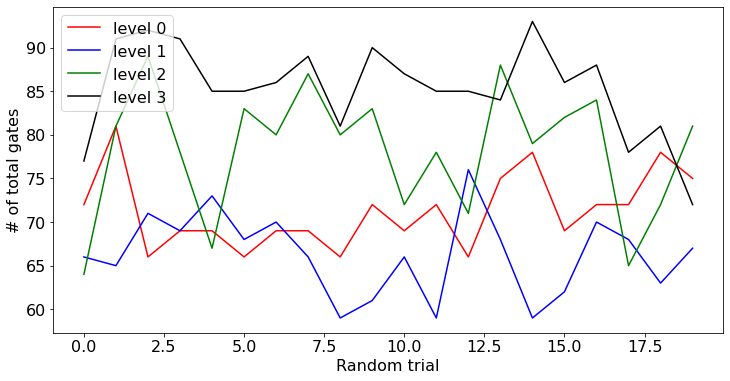

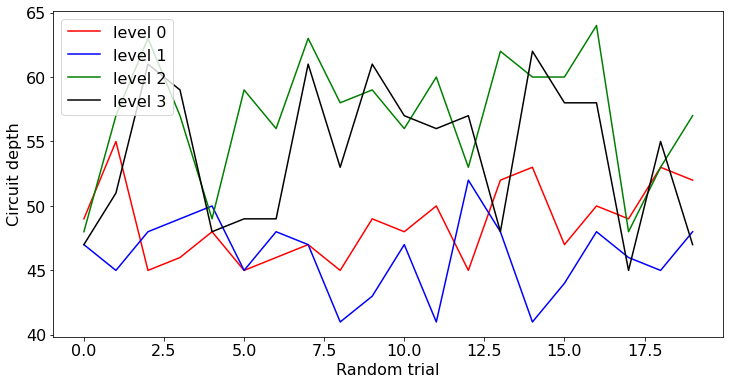

Opt0: Minimum # of cx gates = 36
Opt0: The best circuit is the circut 2 

Opt1: Minimum # of cx gates = 32
Opt1: The best circuit is the circut 8 

Opt2: Minimum # of cx gates = 37
Opt2: The best circuit is the circut 0 

Opt3: Minimum # of cx gates = 32
Opt3: The best circuit is the circut 0


In [41]:
import matplotlib.pyplot as plt

num_cx0 = [c.count_ops()['cx'] for c in tcircs0]
num_cx1 = [c.count_ops()['cx'] for c in tcircs1]
num_cx2 = [c.count_ops()['cx'] for c in tcircs2]
num_cx3 = [c.count_ops()['cx'] for c in tcircs3]

num_tot0 = [c.size() for c in tcircs0]
num_tot1 = [c.size() for c in tcircs1]
num_tot2 = [c.size() for c in tcircs2]
num_tot3 = [c.size() for c in tcircs3]

num_depth0 = [c.depth() for c in tcircs0]
num_depth1 = [c.depth() for c in tcircs1]
num_depth2 = [c.depth() for c in tcircs2]
num_depth3 = [c.depth() for c in tcircs3]

plt.rcParams.update({'font.size': 16})

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx0)),num_cx0,'r',label='level 0')
plt.plot(range(len(num_cx1)),num_cx1,'b',label='level 1')
plt.plot(range(len(num_cx2)),num_cx2,'g',label='level 2')
plt.plot(range(len(num_cx3)),num_cx3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of cx gates')
plt.show()

# Plot total number of gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_tot0)),num_tot0,'r',label='level 0')
plt.plot(range(len(num_tot1)),num_tot1,'b',label='level 1')
plt.plot(range(len(num_tot2)),num_tot2,'g',label='level 2')
plt.plot(range(len(num_tot3)),num_tot3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of total gates')
plt.show()

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_depth0)),num_depth0,'r',label='level 0')
plt.plot(range(len(num_depth1)),num_depth1,'b',label='level 1')
plt.plot(range(len(num_depth2)),num_depth2,'g',label='level 2')
plt.plot(range(len(num_depth3)),num_depth3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('Circuit depth')
plt.show()

print('Opt0: Minimum # of cx gates = %s' % min(num_cx0))
print('Opt0: The best circuit is the circut %s \n' % num_cx0.index(min(num_cx0)))

print('Opt1: Minimum # of cx gates = %s' % min(num_cx1))
print('Opt1: The best circuit is the circut %s \n' % num_cx1.index(min(num_cx1)))

print('Opt2: Minimum # of cx gates = %s' % min(num_cx2))
print('Opt2: The best circuit is the circut %s \n' % num_cx2.index(min(num_cx2)))

print('Opt3: Minimum # of cx gates = %s' % min(num_cx3))
print('Opt3: The best circuit is the circut %s' % num_cx3.index(min(num_cx3)))

## See Qiskit documentations for more detail: https://qiskit.org/documentation/